# Análise exploratória hidrometros 

## População : Hidrometros com troca em **2017**

## [Seaborn | Gráficos](https://seaborn.pydata.org/)

## [Pandas | Data Munging](https://pandas.pydata.org/)

In [2]:
import warnings ; warnings.filterwarnings("ignore", category=RuntimeWarning) 
import sys ; sys.path.append('../scripts')
import pdmunging as pdm

ImportError: No module named 'pdmunging'

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
plt.style.use(['seaborn-whitegrid','tableau-colorblind10'])
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 18

In [1]:
df = pd.read_csv('../data/dataset_substituicoes_2017.csv',\
                 parse_dates=['REL_DAT_SUBSTITUICAO', 'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO'],\
                 decimal=',', thousands='.')

NameError: name 'pd' is not defined

In [4]:
df.head(2)

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_SLG_UNIDADE_ADMIN_DES,REL_COD_UNIDADE_ADMIN_DES,REL_LGE_DSC_LOCAL,REL_QTD_RESIDENCIAL,REL_QTD_COMERCIAL,REL_QTD_INDUSTRIAL,REL_QTD_PUBLICA,...,REL_FLG_PROCESSADO,REL_DAT_SUBSTITUICAO,REL_NUM_SETOR,REL_NUM_QUADRA,REL_SEQ_MARCA_MEDIDOR,REL_SEQ_CAPACIDADE_MEDIDOR,REL_SEQ_MOTIVO_RETIRADA,REL_SEQ_SERVICO,REL_DAT_INS_ANTERIOR,REL_IDADE_MEDIDOR
0,1317755,UN-MTL,45,UN-MTL,45,FORTALEZA,1,0,0,0,...,1,2017-01-26,12,68,10,3,15,31051,2016-01-15,1.0
1,1317964,UN-MTL,45,UN-MTL,45,FORTALEZA,1,0,0,0,...,1,2017-01-25,23,215,10,3,3,31051,2009-11-30,8.0


### Valores nulos

In [5]:
#a = 1-(df.count()/len(df))
#a[a!=0]
# or 
pdm.null_values(df)

REL_TIPO_TARIFA                   1.000000
REL_NUM_FAIXA                     1.000000
REL_SEQ_CFA_CODIGO_FATURAMENTO    0.609212
REL_IDADE_MEDIDOR                 0.000262
dtype: float64

In [ ]:
# Colunas a desconsiderar : REL_TIPO_TARIFA, REL_NUM_FAIXA.
# Eliminar as nulas em REL_SEQ_CFA_CODIGO_FATURAMENTO.
df[['REL_TIPO_TARIFA','REL_NUM_FAIXA', 'REL_SEQ_CFA_CODIGO_FATURAMENTO', 'REL_IDADE_MEDIDOR' ]].head(2)

In [ ]:
# A grande maioria de nossos hidrometros é trocado no periodo de 8 a 10 anos.
sns.catplot(y="REL_IDADE_MEDIDOR",
             height=7,
            kind="count", data=df);

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
# Reduzir amostra para fortaleza , para adcionar setores de abastecimento
# Fortaleza representa mais de 50% das trocas efetuadas no ano.
# Total Municipios : 255
#set(df['REL_LGE_DSC_LOCAL'])
len(set(df['REL_LGE_DSC_LOCAL']))

In [ ]:
# municipios que representam mais de 4% das trocas
df3 = df.groupby(['REL_LGE_DSC_LOCAL'])['REL_LGE_DSC_LOCAL'].count().sort_values()/len(df)
df3[df3>0.04]

In [ ]:
# quantidades dos municipios
df2 = df.groupby(['REL_LGE_DSC_LOCAL'])['REL_LGE_DSC_LOCAL'].count().sort_values()
df2[df2>2447]

In [ ]:
#Exportar
df[df['REL_LGE_DSC_LOCAL'] == 'FORTALEZA']['REL_INSCRICAO'].to_csv('inscricoes_fortaleza.csv')

In [ ]:
# Populacao amostral das trocas efetuadas em fortaleza
# Residenciais nao mistos
# servico 44349 = 336
# shape 2017 = (32172, 74)
df_ = df[(df['REL_LGE_DSC_LOCAL'] == 'FORTALEZA')&\
   (df['REL_QTD_RESIDENCIAL'] > 0)&\
   (df['REL_QTD_COMERCIAL'] == 0)&\
   (df['REL_QTD_INDUSTRIAL'] == 0)&\
   (df['REL_QTD_PUBLICA'] == 0)&\
   (df['REL_SEQ_SERVICO'] == 44349)
  ].copy()
df_.shape

In [ ]:
# df_['REL_INSCRICAO'].to_csv('inscricoes_fortaleza.csv')

# ANALISE DO DATASET APLICADO REGRAS E RECORTE AMOSTRAL

### TRATAMENTO DOS DADOS

In [3]:
#df_.to_csv('dataset_substituicoes_2017_AMOSTRA1.csv', index=False)
df_ = pd.read_csv('dataset_substituicoes_2017_AMOSTRA1.csv', parse_dates=['REL_DAT_SUBSTITUICAO', 'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO'])

In [4]:
# ELIMINO COLUNAS INICALMENTE DESNECESSARIAS
# ELIMINOS VALORES NA
df_.drop(columns=['REL_QTD_PUBLICA',\
                  'REL_QTD_INDUSTRIAL',\
                  'REL_QTD_COMERCIAL',\
                  'REL_NOM_CLIENTE',\
                  'REL_ENDERECO',\
                  'REL_SEQ_SERVICO',\
                  'REL_LGE_DSC_LOCAL',\
                  'REL_TIPO_TARIFA',\
                  'REL_CODIFICACAO',\
                  'REL_COD_UNIDADE_ADMIN_DES',\
                  'REL_SLG_UNIDADE_ADMIN_DES',\
                  'REL_SEQ_CFA_CODIGO_FATURAMENTO',\
                  'REL_FLG_PROCESSADO',\
                  'REL_VOLUME_MEDIO_3',  'REL_VOLUME_MEDIO_6', 'REL_VOLUME_MEDIO_12',\
                  'REL_VOLUME_MEDIO_24', 'REL_VOLUME_MEDIO_1MES_3', 'REL_VOLUME_MEDIO_1MES_6', 'REL_VOLUME_MEDIO_1MES_12',\
                  'REL_VOLUME_MEDIO_1MES_24',\
                  'REL_NUM_FAIXA']
         ,inplace=True)
df_.dropna(inplace=True)
df_.shape

(32150, 52)

In [40]:
# CABECALHO DO DATASET
df_.columns

Index(['REL_SEQ_DESEMPENHO_MEDIDOR', 'REL_SLG_UNIDADE_ADMIN',
       'REL_COD_UNIDADE_ADMIN', 'REL_QTD_RESIDENCIAL', 'REL_NUM_MEDIDOR',
       'REL_NUM_MEDIDOR_ANT', 'REL_INSCRICAO', 'REL_DAT_INSTALACAO',
       'REL_VLR_MEDIO_ATUAL_3', 'REL_VLR_MEDIO_ATUAL_6',
       'REL_VLR_MEDIO_ATUAL_12', 'REL_VLR_MEDIO_ATUAL_24',
       'REL_VLR_MEDIO_ATUAL_1MES_3', 'REL_VLR_MEDIO_ATUAL_1MES_6',
       'REL_VLR_MEDIO_ATUAL_1MES_12', 'REL_VLR_MEDIO_ATUAL_1MES_24',
       'REL_VLR_MEDIO_ANT_3', 'REL_VLR_MEDIO_ANT_6', 'REL_VLR_MEDIO_ANT_12',
       'REL_VLR_MEDIO_ANT_24', 'REL_VLR_MEDIO_ANT_1MES_3',
       'REL_VLR_MEDIO_ANT_1MES_6', 'REL_VLR_MEDIO_ANT_1MES_12',
       'REL_VLR_MEDIO_ANT_1MES_24', 'REL_VOLUME_MED_ATUAL_3',
       'REL_VOLUME_MED_ATUAL_6', 'REL_VOLUME_MED_ATUAL_12',
       'REL_VOLUME_MED_ATUAL_24', 'REL_VOLUME_MED_ATUAL_1MES_3',
       'REL_VOLUME_MED_ATUAL_1MES_6', 'REL_VOLUME_MED_ATUAL_1MES_12',
       'REL_VOLUME_MED_ATUAL_1MES_24', 'REL_VOLUME_MED_ANT_3',
       'REL_VOLUME_MED_

### ANALISE EXPLORATORIA

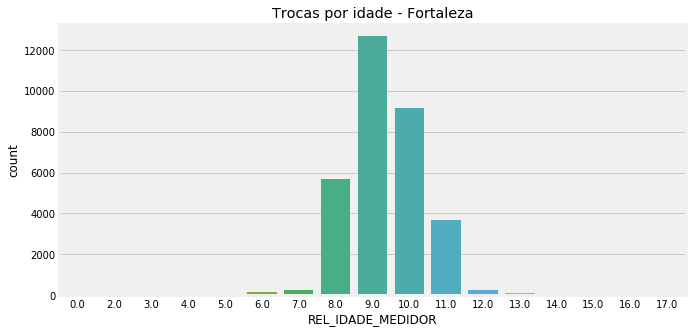

In [41]:
plt.figure(figsize=(10, 5))
plt.title("Trocas por idade - Fortaleza ")
sns.countplot(x='REL_IDADE_MEDIDOR', data=df_, orient="h")

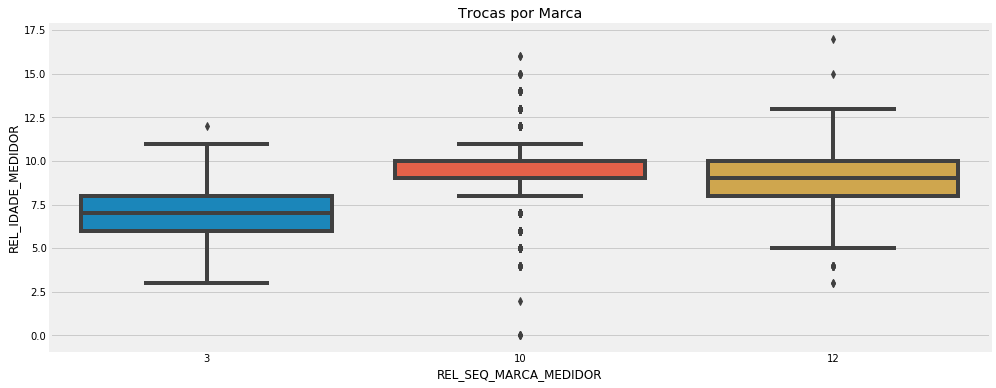

In [6]:
plt.figure(figsize=(15, 6))
plt.title("Trocas por Marca")
sns.boxplot(x="REL_SEQ_MARCA_MEDIDOR", y="REL_IDADE_MEDIDOR", data=df_)

In [7]:
#Resumo estatistico da coluna
df_['REL_QTD_RESIDENCIAL'].describe()

count    32150.000000
mean         1.647869
std          5.816222
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        240.000000
Name: REL_QTD_RESIDENCIAL, dtype: float64

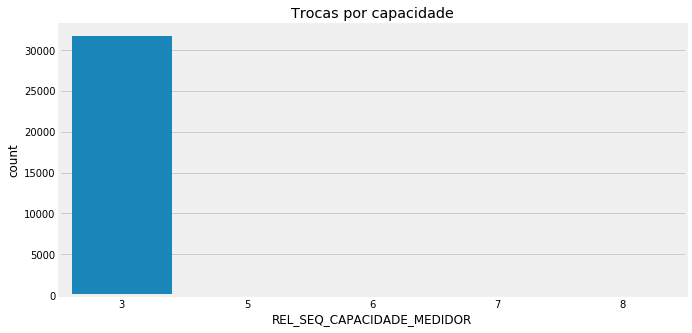

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Trocas por capacidade")
sns.countplot(x='REL_SEQ_CAPACIDADE_MEDIDOR', data=df_, orient="h")

In [9]:
df_['REL_SEQ_CAPACIDADE_MEDIDOR'].value_counts()

3    31645
5      201
6      172
7      122
8       10
Name: REL_SEQ_CAPACIDADE_MEDIDOR, dtype: int64

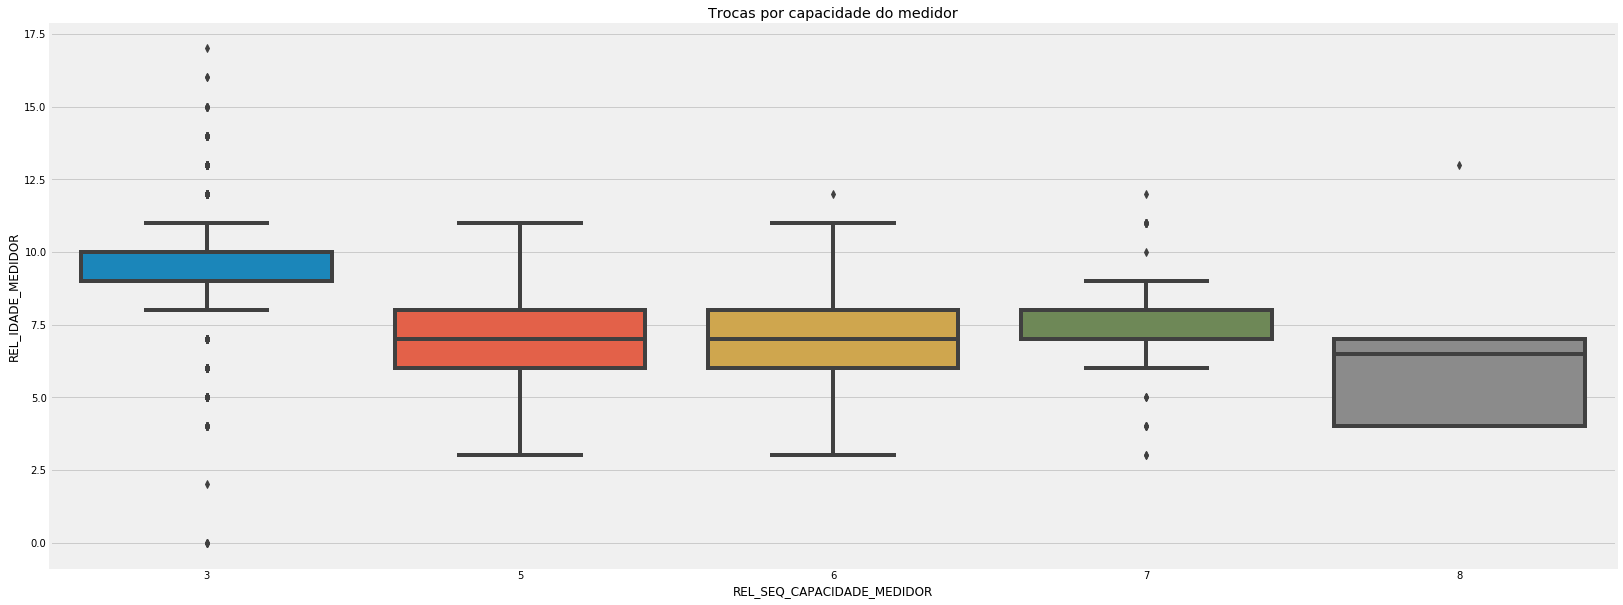

In [10]:
plt.figure(figsize=(25, 10))
plt.title("Trocas por capacidade do medidor")
sns.boxplot(x="REL_SEQ_CAPACIDADE_MEDIDOR", y="REL_IDADE_MEDIDOR", data=df_)

### MERGE DE DATAFRAMES 

In [11]:
# DATAFRAME COM DADOS DE ELEVACAO
elevacao = pd.read_csv('../data/elevacao.csv')

In [12]:
#CHAMA FUNCAO PARA VERIFICAR NULOS NO DATAFRAME
pdm.null_values(elevacao)

latitude               0.0023
longitude              0.0023
elevacao               0.0023
setor_abastecimento    0.0023
dtype: float64

In [13]:
# UNE DATAFRAMES DE TROCAS COM ELEVACAO , EM SEGUIDA MOSTRA HEAD(2)
df_mrg = pd.merge(df_, elevacao, left_on="REL_INSCRICAO", right_on="inscricoes" )
df_mrg.head(2)

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_QTD_RESIDENCIAL,REL_NUM_MEDIDOR,REL_NUM_MEDIDOR_ANT,REL_INSCRICAO,REL_DAT_INSTALACAO,REL_VLR_MEDIO_ATUAL_3,REL_VLR_MEDIO_ATUAL_6,...,REL_SEQ_MOTIVO_RETIRADA,REL_DAT_INS_ANTERIOR,REL_IDADE_MEDIDOR,fid,id,inscricoes,latitude,longitude,elevacao,setor_abastecimento
0,1371049,UN-MTL,45,3,A16F260231,A07S089979,2019957,2017-01-21,87.31,98.18,...,2,2007-04-19,10.0,1,95,2019957,-3.774990,-38.482474,9.348175,10.0
1,1364626,UN-MTL,45,1,A17F000595,A08F499040,53155,2017-02-07,31.51,33.11,...,2,2009-02-16,8.0,2,164,53155,-3.731884,-38.519029,17.000000,17.0


In [14]:
# percentual de NaN por coluna
pdm.null_values(df_mrg)

latitude               0.002301
longitude              0.002301
elevacao               0.002301
setor_abastecimento    0.002301
dtype: float64

In [15]:
# dropa NaN
df_mrg.dropna(inplace=True)

```python
# IDENTIFICA VALORES NEGATIVOS NO DATAFRAME
def negative_values(dataframe):
    arrnegativos = []
    for coluna in dataframe.columns:
        considerar = ['int64', 'float64']
        if dataframe[coluna].dtypes in considerar:
            numnegativos = len(dataframe[dataframe[coluna]<0])
            percentual = numnegativos/len(dataframe[coluna]) 
            if percentual > 0:
                arrnegativos.append([coluna, len(dataframe[coluna]), numnegativos, percentual ])
    return arrnegativos
```

In [16]:
#verifica valores negativos
#restam somente as colunas de lat, long que sao por natureza negativas em nossa regiao.
pdm.negative_values(df_mrg)

[['latitude', 32080, 32080, 1.0], ['longitude', 32080, 32080, 1.0]]

In [17]:
# MAPEIA COLUNA MOTIVO RETIRADA
REL_SEQ_MOTIVO_RETIRADA_MAP = {2:'MANUTENCAO PREVENTIVA', 3: 'MANUTENCAO CORRETIVA', 4: 'PARA AFERICAO'}
df_mrg['REL_SEQ_MOTIVO_RETIRADA_MAP'] = df_mrg.REL_SEQ_MOTIVO_RETIRADA.map(REL_SEQ_MOTIVO_RETIRADA_MAP)

In [1]:
# EXTRAI O ANO DO MEDIDOR
def dezena_para_ano(dezena):
    if dezena<20:
        return 2000+dezena
    else:
        return 1900+dezena

df_mrg['ANOHIDROMETRO'] = df_mrg['REL_NUM_MEDIDOR_ANT'].apply(lambda x: int(x[1:3]))
df_mrg['ANOHIDROMETRO'] = df_mrg['ANOHIDROMETRO'].apply(dezena_para_ano)

NameError: name 'df_mrg' is not defined

In [19]:
# FILTRA HIDROMETROS TROCADOS COM IDADE >10
df_mrg[df_mrg['REL_IDADE_MEDIDOR']>10][['REL_NUM_MEDIDOR_ANT','REL_IDADE_MEDIDOR', 'REL_INSCRICAO', 'REL_SEQ_INSTALACAO_ANT']].head(2)

,REL_NUM_MEDIDOR_ANT,REL_IDADE_MEDIDOR,REL_INSCRICAO,REL_SEQ_INSTALACAO_ANT
5,A06F399129,11.0,3692329,3692329
9,A06F323939,11.0,10311394,10311394


In [20]:
# IMPORTO E MAPEIO ULTIMOS STATUS DOS HIDROMETROS ATE 2017
LOM_COD_TIPO_LOTE_MAP = {1: 'NOVO', 2:'RECUPERADO'}
historico_hidrometro = pd.read_csv('../data/tipo_lote_hidrometro.csv',parse_dates=['LOM_DAT_FECHAMENTO_LOTE'])
historico_hidrometro['LOM_COD_TIPO_LOTE'] = historico_hidrometro['LOM_COD_TIPO_LOTE'].map(LOM_COD_TIPO_LOTE_MAP)
# FACO O MERGE COM O DATAFRAME 
df_mrg2 = pd.merge(df_mrg, historico_hidrometro, left_on="REL_NUM_MEDIDOR_ANT", right_on="REL_NUM_MEDIDOR" )

In [21]:
# CRIO COLUNA PARA CLASSIFICAR DUPLICADOS
def coluna_agg(dataframe, grupo, valor, tipo='count'):
    return dataframe.groupby(grupo)[valor].transform(tipo)

df_mrg2['QTD_REGISTROS'] = coluna_agg(df_mrg2, 'REL_SEQ_DESEMPENHO_MEDIDOR', 'REL_SEQ_DESEMPENHO_MEDIDOR')
df_mrg2 = df_mrg2.sort_values(by=['REL_SEQ_DESEMPENHO_MEDIDOR','LOM_COD_TIPO_LOTE'])
df_mrg2.drop_duplicates(['REL_SEQ_DESEMPENHO_MEDIDOR'], keep='first', inplace=True)

In [22]:
df_mrg2[df_mrg2['QTD_REGISTROS']>1].sort_values(by='REL_NUM_MEDIDOR_ANT')[['REL_NUM_MEDIDOR_ANT', 'REL_DAT_SUBSTITUICAO','LOM_DAT_FECHAMENTO_LOTE',\
         'REL_DAT_INS_ANTERIOR', 'REL_DAT_INSTALACAO','LOM_COD_TIPO_LOTE' ,'REL_SEQ_DESEMPENHO_MEDIDOR' ]].head(2)

,REL_NUM_MEDIDOR_ANT,REL_DAT_SUBSTITUICAO,LOM_DAT_FECHAMENTO_LOTE,REL_DAT_INS_ANTERIOR,REL_DAT_INSTALACAO,LOM_COD_TIPO_LOTE,REL_SEQ_DESEMPENHO_MEDIDOR
21673,0001290549,2017-05-19,1900-01-01,2003-08-11,2017-05-19,NOVO,1915911
39983,A00A007443,2017-05-18,1900-01-01,2004-04-26,2017-05-18,NOVO,1916430


In [23]:
# POR FIM FICA SOMENTE A LINHA DE DUPLICADO, PROCESSO?
df_mrg2[df_mrg2['REL_NUM_MEDIDOR_ANT'].duplicated()]

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_QTD_RESIDENCIAL,REL_NUM_MEDIDOR_x,REL_NUM_MEDIDOR_ANT,REL_INSCRICAO,REL_DAT_INSTALACAO,REL_VLR_MEDIO_ATUAL_3,REL_VLR_MEDIO_ATUAL_6,...,latitude,longitude,elevacao,setor_abastecimento,REL_SEQ_MOTIVO_RETIRADA_MAP,ANOHIDROMETRO,LOM_COD_TIPO_LOTE,LOM_DAT_FECHAMENTO_LOTE,REL_NUM_MEDIDOR_y,QTD_REGISTROS
23886,1917953,UN-MTN,117,1,A08F224848,A05F328870,7032390,2017-05-19,0.0,0.0,...,-3.715726,-38.583196,14.961788,5.0,MANUTENCAO PREVENTIVA,2005,NOVO,1900-01-01,A05F328870,4


In [24]:
df_mrg2.drop_duplicates(['REL_NUM_MEDIDOR_ANT'], keep=False, inplace=True)
df_mrg2[df_mrg2['REL_NUM_MEDIDOR_ANT'].duplicated()]

,REL_SEQ_DESEMPENHO_MEDIDOR,REL_SLG_UNIDADE_ADMIN,REL_COD_UNIDADE_ADMIN,REL_QTD_RESIDENCIAL,REL_NUM_MEDIDOR_x,REL_NUM_MEDIDOR_ANT,REL_INSCRICAO,REL_DAT_INSTALACAO,REL_VLR_MEDIO_ATUAL_3,REL_VLR_MEDIO_ATUAL_6,...,latitude,longitude,elevacao,setor_abastecimento,REL_SEQ_MOTIVO_RETIRADA_MAP,ANOHIDROMETRO,LOM_COD_TIPO_LOTE,LOM_DAT_FECHAMENTO_LOTE,REL_NUM_MEDIDOR_y,QTD_REGISTROS


```python
# CLASSIFICA HIDROMETROS POR ANO DO LOTE
def classifica_hidrometro(ano_hidrometro):
    ano_amostra = 2017
    idade_hidrometro = ano_amostra - ano_hidrometro
    if idade_hidrometro < 2:
        return 'PRIMEIRO ANO'
    elif (idade_hidrometro > 1) & (idade_hidrometro < 5):
        return 'ABAIXO NORMA INMETRO'
    elif (idade_hidrometro == 5):
        return 'ACORDO NORMA INMETRO'
    elif (idade_hidrometro > 5) & (idade_hidrometro < 11):
        return 'ACIMA NORMA INMETRO'
    elif (idade_hidrometro > 10):
        return 'DESCARTE IMEDIATO'
    else:
        return 'VERIFICAR'

df_mrg['IDADEHIDROMETROCLASSE'] = df_mrg['ANOHIDROMETRO'].apply(classifica_hidrometro)
```

In [30]:
# IDADE DO MEDIDOR COM BASE NO LOTE
df_mrg2['REL_IDADE_MEDIDOR_LOTE'] = df_mrg2['ANOHIDROMETRO'].apply(lambda x: 2017 - x)

In [38]:
# DIFERENCA ENTRE MEDIA DE 2 ANOS COM A MEDIA DOS ULTIMOS 3 MESES
df_mrg2['VARIACAO2ANOS3MESES'] = df_mrg2['REL_VOLUME_MED_ANT_3']/ df_mrg2['REL_VOLUME_MED_ANT_24']
df_mrg2['VARIACAO1ANO3MESES'] = df_mrg2['REL_VOLUME_MED_ANT_3']/ df_mrg2['REL_VOLUME_MED_ANT_12']

In [32]:
df_mrg2['VARIACAO2ANOS3MESES'].describe()

count    29083.000000
mean         0.977411
std          0.309236
min          0.019608
25%          0.833333
50%          1.000000
75%          1.100000
max          6.750000
Name: VARIACAO2ANOS3MESES, dtype: float64

In [33]:
df_mrg2[['REL_IDADE_MEDIDOR', 'LOM_COD_TIPO_LOTE', 'ANOHIDROMETRO']].head(2)

,REL_IDADE_MEDIDOR,LOM_COD_TIPO_LOTE,ANOHIDROMETRO
40477,9.0,NOVO,2001
30,10.0,NOVO,2007


In [34]:
def vida_util_anterior(colunas):
    idadehidrometro = 2017 - colunas[2]
    idadenoimovel = colunas[0]
    vidaanterior = idadehidrometro-idadenoimovel
    situacao = colunas[1]
    if vidaanterior==0:
        if idadehidrometro < 2:
            return 'UNICO IMOVEL '+' - '+'PRIMEIRO ANO'
        elif (idadehidrometro > 1) & (idadehidrometro < 5):
            return 'UNICO IMOVEL '+' - '+ 'ABAIXO NORMA INMETRO'
        elif (idadehidrometro == 5):
            return 'UNICO IMOVEL '+' - '+ 'ACORDO NORMA INMETRO'
        elif (idadehidrometro > 5) & (idadehidrometro < 11):
            return 'UNICO IMOVEL '+' - '+ 'ACIMA NORMA INMETRO'
        elif (idadehidrometro > 10):
            return 'UNICO IMOVEL '+' - '+ 'DESCARTE IMEDIATO'
        else:
            return 'VERIFICAR'
    else:
        if idadehidrometro < 2:
            return 'JA MIGROU IMOVEL - '+'PRIMEIRO ANO'
        elif (idadehidrometro > 1) & (idadehidrometro < 5):
            return 'JA MIGROU IMOVEL - '+'ABAIXO NORMA INMETRO'
        elif (idadehidrometro == 5):
            return 'JA MIGROU IMOVEL - '+'ACORDO NORMA INMETRO'
        elif (idadehidrometro > 5) & (idadehidrometro < 11):
            return 'JA MIGROU IMOVEL - '+'ACIMA NORMA INMETRO'
        elif (idadehidrometro > 10):
            return 'JA MIGROU IMOVEL - '+'DESCARTE IMEDIATO'
        else:
            return 'VERIFICAR'

df_mrg2['IDADEHIDROMETROCLASSE'] = df_mrg2[['REL_IDADE_MEDIDOR', 'LOM_COD_TIPO_LOTE', 'ANOHIDROMETRO']].apply(vida_util_anterior, axis=1)

In [ ]:
aplicar_onehotencoding = ['REL_SLG_UNIDADE_ADMIN', 'REL_SEQ_MARCA_MEDIDOR', 'REL_SEQ_CAPACIDADE_MEDIDOR', 
                          'REL_SEQ_MOTIVO_RETIRADA_MAP', 'setor_abastecimento', 'ANOHIDROMETRO',
                         'LOM_COD_TIPO_LOTE','IDADEHIDROMETROCLASSE']

remover = ['REL_SEQ_DESEMPENHO_MEDIDOR', 'REL_COD_UNIDADE_ADMIN','REL_NUM_MEDIDOR_ANT', 
           'REL_INSCRICAO', 'REL_DAT_INSTALACAO','REL_VLR_MEDIO_ATUAL_3','REL_VLR_MEDIO_ATUAL_6', 
           'REL_VLR_MEDIO_ATUAL_12', 'REL_VLR_MEDIO_ATUAL_1MES_24','REL_VLR_MEDIO_ATUAL_1MES_3',
          'REL_VLR_MEDIO_ATUAL_1MES_6','REL_VLR_MEDIO_ATUAL_1MES_12', 'REL_VLR_MEDIO_ATUAL_1MES_24', 
           'REL_VLR_MEDIO_ANT_3', 'REL_VLR_MEDIO_ANT_6','REL_VLR_MEDIO_ANT_12', 'REL_VLR_MEDIO_ANT_24', 
           'REL_VLR_MEDIO_ANT_1MES_3', 'REL_VLR_MEDIO_ANT_1MES_6', 'REL_VLR_MEDIO_ANT_1MES_12',
          'REL_VLR_MEDIO_ANT_1MES_24', 'REL_VOLUME_MED_ATUAL_3','REL_VOLUME_MED_ATUAL_6','REL_VOLUME_MED_ATUAL_12',
       'REL_VOLUME_MED_ATUAL_24', 'REL_VOLUME_MED_ATUAL_1MES_3','REL_VOLUME_MED_ATUAL_1MES_6',
        'REL_VOLUME_MED_ATUAL_1MES_12','REL_VOLUME_MED_ATUAL_1MES_24', 'REL_VOLUME_MED_ANT_3',
       'REL_VOLUME_MED_ANT_6', 'REL_VOLUME_MED_ANT_12','REL_VOLUME_MED_ANT_24', 'REL_VOLUME_MED_ANT_1MES_3',
       'REL_VOLUME_MED_ANT_1MES_6', 'REL_VOLUME_MED_ANT_1MES_12','REL_VOLUME_MED_ANT_1MES_24', 'REL_COMPETENCIA', 
        'REL_LGE_COD_SIG','REL_SEQ_INSTALACAO', 'REL_SEQ_INSTALACAO_ANT', 'REL_DAT_SUBSTITUICAO', 'REL_NUM_SETOR', 
           'REL_NUM_QUADRA','REL_DAT_INS_ANTERIOR','fid', 'id', 'inscricoes','latitude', 
           'longitude', 'LOM_DAT_FECHAMENTO_LOTE', 'REL_NUM_MEDIDOR_y', 'REL_NUM_MEDIDOR_x','QTD_REGISTROS', 
           'REL_SEQ_MOTIVO_RETIRADA', 'REL_VLR_MEDIO_ATUAL_24', 'REL_IDADE_MEDIDOR_LOTE']

In [ ]:
df_mrg2.drop(remover, axis=1, inplace=True)

In [ ]:
for categoria in aplicar_onehotencoding:
    df_mrg2 = pdm.set_onehotencoding(df_mrg2, categoria, categoria)

In [ ]:
df_mrg2.head(2)

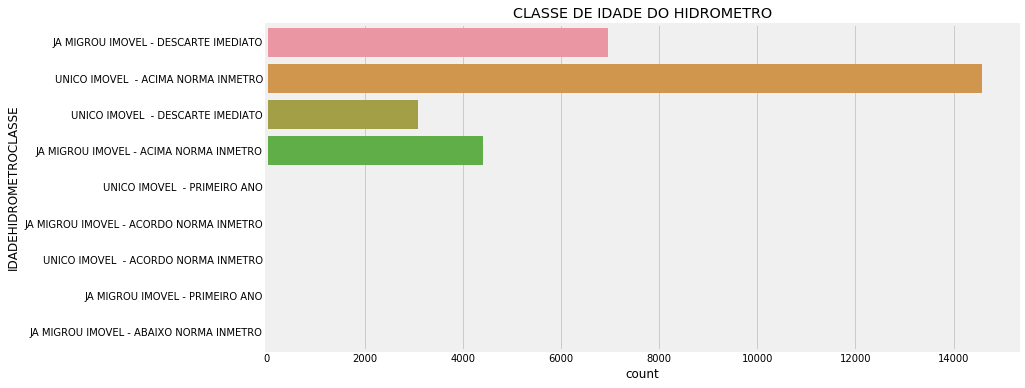

In [35]:
plt.figure(figsize=(12, 6))
plt.title("CLASSE DE IDADE DO HIDROMETRO")
sns.countplot(y='IDADEHIDROMETROCLASSE', data=df_mrg2)

In [ ]:
df_mrg2['IDADEHIDROMETROCLASSE'].value_counts()

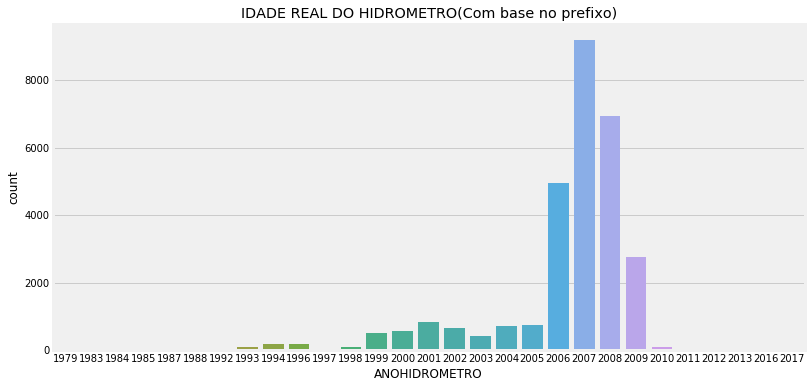

In [36]:
plt.figure(figsize=(12, 6))
plt.title("IDADE REAL DO HIDROMETRO(Com base no prefixo)")
sns.countplot(x='ANOHIDROMETRO', data=df_mrg2)

In [ ]:
df_mrg2['ANOHIDROMETRO'].value_counts()

In [37]:
df_mrg2[df_mrg2['IDADEHIDROMETROCLASSE']=='S TROCA NOVO - DESCARTE IMEDIATO']\
[['REL_INSCRICAO','REL_NUM_MEDIDOR_ANT','REL_IDADE_MEDIDOR', 'LOM_COD_TIPO_LOTE',\
  'ANOHIDROMETRO', 'IDADEHIDROMETROCLASSE']].head(2)

,REL_INSCRICAO,REL_NUM_MEDIDOR_ANT,REL_IDADE_MEDIDOR,LOM_COD_TIPO_LOTE,ANOHIDROMETRO,IDADEHIDROMETROCLASSE


In [7]:
df = pd.read_csv('../data/DF.csv')

Text(0, 0.5, 'Anos de uso')

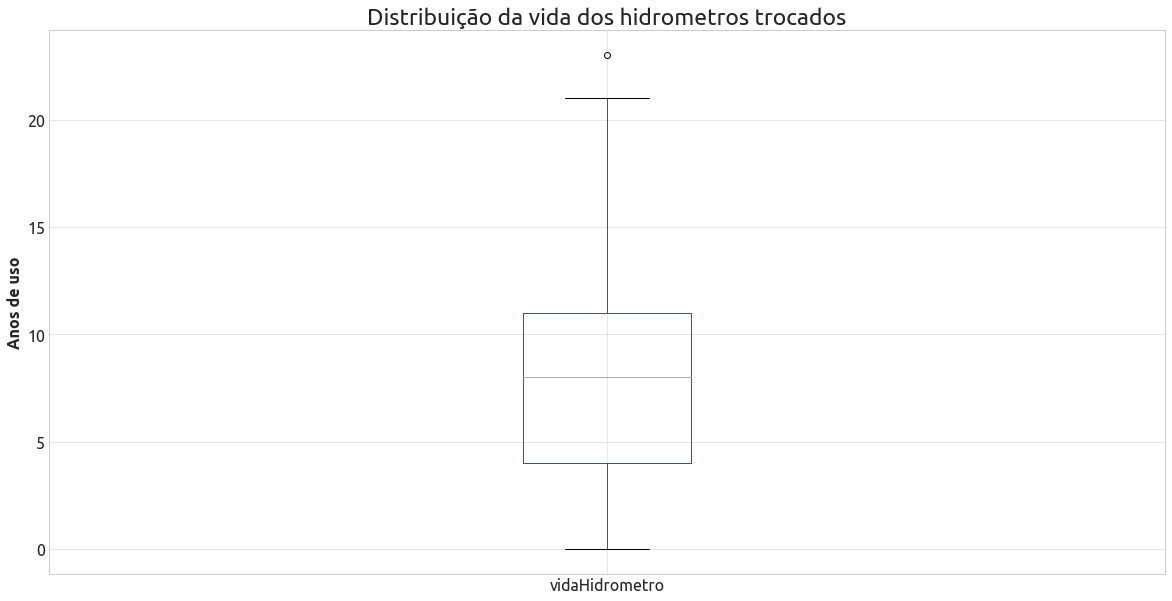

In [69]:
df[(df.vidaHidrometro<25)& (df.bhc_dsc_status == 0)].vidaHidrometro.plot(kind='box', title="Distribuição da vida dos hidrometros trocados", figsize=(20,10))
plt.ylabel('Anos de uso')

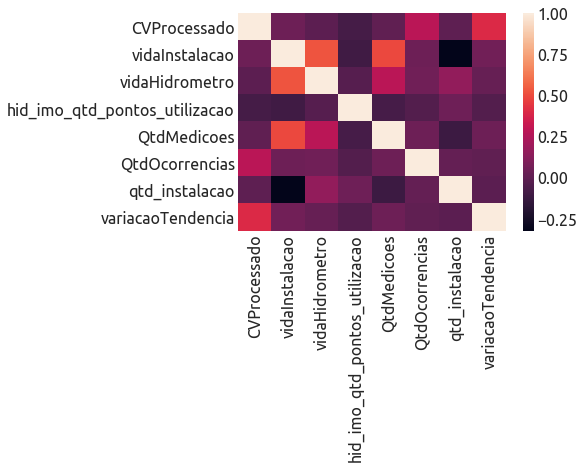

In [65]:
correlacao = df[(df.vidaHidrometro<25)& (df.bhc_dsc_status == 0)].drop(['Unnamed: 0','IDHidrometro','bhc_dsc_status'], axis=1).corr()
sns.heatmap(correlacao)

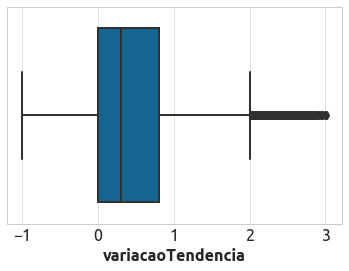

In [82]:

sns.boxplot(x=df.variacaoTendencia)

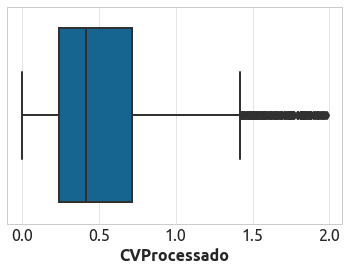

In [85]:
sns.boxplot('CVProcessado', hue='bhc_dsc_status', data=df)

In [ ]:
O processo de verificação e troca dos hidrometros se dar 